# Case X. Template
Nuttapol Saiboonruen<br>
Last edited: 03.02.2018<br>
Cognitive Systems for Health Technology Applications<br>
[Helsinki Metropolia University of Applied Sciences](http://www.metropolia.fi/en/)<br>

## 1. Objectives

1. Classify normal(0) or non-normal (1-4) from labels.
2. Lower result that we prdict the non-normal as normal case.
3. Getting high accuracy(85-90%) of the model that can predict the right answer.
4. the model can avoid the over-fitting.

## 2. Required libraries

### Import libraries
First we import all libraries (or modules) and functions needed in this session.

-  [`%pylab inline`](https://ipython.readthedocs.io/en/stable/interactive/magics.html#line-magics)  loads numpy and matplotlib modules
- [`import time`](https://duckduckgo.com/?q=python+time.time&t=ffab&atb=v150-2__&ia=about) we use for clocking the training evaluation time
- [`import warnings`](https://docs.python.org/2/library/warnings.html#temporarily-suppressing-warnings) is used for suppress warnings at the very end of the code
- `import pandas as pd` imports the pandas library and we can use the short notation `np`
-  `from sklearn ...` we import some special functions from scikit-learn module
- `from keras ...` is used for special keras functions

In [1]:
# Import libraries
%pylab inline
import time
import warnings
import pandas as pd

from sklearn.utils import shuffle
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

from keras.utils import to_categorical
from keras import models, layers
from keras.models import Sequential

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


## 3. Data description and preprocessing

### Import the data
First of all we import the data cleveland from the data source as raw data.<br>
The `date.head()` shows the first 5 rows of the data, The `data.tail()` shows the last 5 rows of the data 

In [2]:
# Import data from url 
data = pd.read_csv(r'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', 
#r' means interprete this source in the raw.
                        sep = ',', 
                        header = None, 
                        index_col = None,
                        na_values = '?') # when this code find ?(missing values) and it will replace by na_values.
#show first 5 rows of the data
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
#show last 5 rows of the data
data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


As the original file doesn't contain the column names we give the ourselves. The missing values are replaced with column-wise median-values. Lastly we [shuffle](https://duckduckgo.com/?q=python+suffle&t=ffab&atb=v150-2__&ia=qa), e.g. change randomly the order of the rows.

In [4]:
#adding the column name
name_list = ['age', 'sex', 'cp','trestbps', 'chol', 'fbs','restecg', 'thalac','exang','oldpeak','slope','ca','thal','num']

data.columns = name_list
data.head()

# Fill missing data with columnwise median values
data = data.fillna(data.median())

# shuffle to random rows
data = shuffle(data)
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalac,exang,oldpeak,slope,ca,thal,num
104,49.0,1.0,3.0,120.0,188.0,0.0,0.0,139.0,0.0,2.0,2.0,3.0,7.0,3
117,35.0,0.0,4.0,138.0,183.0,0.0,0.0,182.0,0.0,1.4,1.0,0.0,3.0,0
88,53.0,0.0,4.0,138.0,234.0,0.0,2.0,160.0,0.0,0.0,1.0,0.0,3.0,0
210,37.0,0.0,3.0,120.0,215.0,0.0,0.0,170.0,0.0,0.0,1.0,0.0,3.0,0
181,56.0,0.0,4.0,134.0,409.0,0.0,2.0,150.0,1.0,1.9,2.0,2.0,7.0,2


The [`data.describe()`](https://duckduckgo.com/?q=pandas+describe&t=ffab&atb=v150-2__&ia=web) (see below) calculates the descriptive statistics.

In [5]:
# Check the data statistics
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalac,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


### Modify data
From the given data set the num column(label) have 5 score (0-4) 0 means healthy and 1-4 mean unhealthy. But we need only two score 0 and 1 to determine healthy and unhealthy. So, we use the `data.replace()` for replace score 2,3 and 4 with score 1.

In [6]:
#replace labels from 2,3 and 4 with 1 toget the labels that have only 0,1 to perform binary classification 
data=data.replace({'num': {2: 1, 3: 1, 4:1}})
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalac,exang,oldpeak,slope,ca,thal,num
11,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,0
71,67.0,1.0,4.0,125.0,254.0,1.0,0.0,163.0,0.0,0.2,2.0,2.0,7.0,1
225,34.0,0.0,2.0,118.0,210.0,0.0,0.0,192.0,0.0,0.7,1.0,0.0,3.0,0
39,61.0,1.0,3.0,150.0,243.0,1.0,0.0,137.0,1.0,1.0,2.0,0.0,3.0,0
15,57.0,1.0,3.0,150.0,168.0,0.0,0.0,174.0,0.0,1.6,1.0,0.0,3.0,0
72,62.0,1.0,4.0,120.0,267.0,0.0,0.0,99.0,1.0,1.8,2.0,2.0,7.0,1
201,64.0,0.0,4.0,180.0,325.0,0.0,0.0,154.0,1.0,0.0,1.0,0.0,3.0,0
43,59.0,1.0,3.0,150.0,212.0,1.0,0.0,157.0,0.0,1.6,1.0,0.0,3.0,0
146,57.0,1.0,4.0,165.0,289.0,1.0,2.0,124.0,0.0,1.0,2.0,3.0,7.0,1
10,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,0


### Scale the data
After we modified the data.<br>
We divided the data into two type that is input data and output data(labels). Then, we scale the data into one scale to avoid the bias from the data that have many range of values.

In [7]:
# Select the data (input) columns
data_list = ['age', 'sex', 'cp','trestbps', 'chol', 'fbs','restecg', 'thalac','exang','oldpeak','slope','ca','thal']
dataInput = data[data_list]

# Scale the data
dataInput_min = dataInput.min()
dataInput_max = dataInput.max()
data_norm = (dataInput - dataInput_min)/(dataInput_max - dataInput_min)
                               
# Check descriptive statistics of normalized data
data_norm.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalac,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.529978,0.679868,0.719472,0.355564,0.275555,0.148515,0.495050,0.600055,0.326733,0.167678,0.300330,0.221122,0.430693
std,0.188305,0.467299,0.320042,0.166035,0.118212,0.356198,0.497486,0.174618,0.469794,0.187270,0.308113,0.311458,0.484596
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.395833,0.000000,0.666667,0.245283,0.194064,0.000000,0.000000,0.477099,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.562500,1.000000,0.666667,0.339623,0.262557,0.000000,0.500000,0.625954,0.000000,0.129032,0.500000,0.000000,0.000000
75%,0.666667,1.000000,1.000000,0.433962,0.340183,0.000000,1.000000,0.725191,1.000000,0.258065,0.500000,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Binarization

One hot encoder is use to perform “binarization” of the category and include it as a suitable feature to train the model.<br>
and we use plt to visualize the labels in form of histogram.

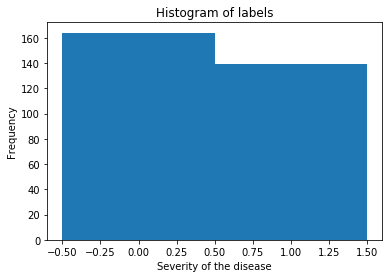

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.

In [8]:
# Select labels (output)
labels = data['num']

# Plot the histogram of the labels (severity of the disease)
plt.hist(labels, bins = [-0.5, 0.5, 1.5])
plt.xlabel('Severity of the disease')
plt.ylabel('Frequency')
plt.title('Histogram of labels')
show()

# Code labels to categorical output
one_hot_labels = to_categorical(labels)
one_hot_labels

### Splite the data

Next we splited the data to 3 set that are training set, validation set and test set. First 253 rows are training set, row 254 to row 278 are validation set and the rest are test set. These 3 data sets use to train and evaluate our models.

In [9]:
# Split the data and labels into training, validation and test sets 
train_data = data_norm[:253]
val_data = data_norm[253:]
#test_data = data_norm[278:]

train_labels = one_hot_labels[:253]
val_labels = one_hot_labels[253:]
#test_labels = one_hot_labels[278:]

# Check the shapes of the data
print('Shape of')
print('  full data:        ', data_norm.shape)
print('  train data:       ',train_data.shape)
print('  validation data:  ',val_data.shape)
#print('  test data:  ',test_data.shape)
print('  train labels:     ',train_labels.shape)
print('  validation labels:',val_labels.shape)
#print('  test labels:',test_labels.shape)

Shape of
  full data:         (303, 13)
  train data:        (253, 13)
  validation data:   (50, 13)
  train labels:      (253, 2)
  validation labels: (50, 2)


## 4. Modeling and compilation


The model is very simple sequential architecture with 5 layers of neurons. The input (13) is fully connected to 4 middle neurons, which are then connected the same one hidden layer that use ReLU(Rectified Linear Unit) as activation function, it connected to the next 2 hidden layers, 4 neurons which use sigmoid as activation function and 2 output neurons That is separated by 1 dropout layer for prevent the over-fitting.

We use `adam` optimizer and standard `binary_crossentropy` loss-function and `accuracy` metrics.


In [10]:
# Build the model
# The model has 5 hidden layers with 2 relu and 2 simoid activation fuction and 1 dropout for prevent the over-fitting.
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(13,)))
model.add(layers.Dense(4, activation='relu', input_shape=(4,)))
model.add(layers.Dense(4, activation='sigmoid', input_shape=(4,)))
model.add(layers.Dropout(0.20))
model.add(layers.Dense(2, activation='sigmoid', input_shape=(4,)))

model.summary()

# Compile the model
# for tha loss function we use binary crossentropy for binary classification
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',  metrics = ['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 56        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 20        
_________________________________________________________________
dropout_1 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 10        
Total params: 106
Trainable params: 106
Non-trainable params: 0
_________________________________________________________________


## 5. Training and Validation

In training we run 75 epochs with batch size of 3 and given validation data seperately.

In [11]:
# Fit the model with the data and keep record on elapsed time
t_start = time.time()
history = model.fit(train_data, train_labels, 
                    epochs = 75, 
                    batch_size = 3, 
                    verbose = 0,
                    validation_data = (val_data, val_labels))
t_end = time.time()
print('Elapsed time: {:.2f} seconds'.format(t_end - t_start))

Elapsed time: 5.50 seconds


Next we correct the training data for use to analyse the model.

In [12]:
# Get the training data
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)

## 6. Evaluation

In evaluation we calculate the accuracy by using accuracy = number of collect prediction/ Total number of prediction, and we also construct the confusion metrix. After that, we calculate the precision, recall and f-score.

In [13]:
# Print total accuracy and confusion matrix
val_predicts = model.predict(data_norm)
y_pred = argmax(val_predicts, axis = 1)

# Best guess = Guess that all are normal
simple_guess = zeros(len(y_pred))
cm0 = confusion_matrix(labels, simple_guess)
#Transpose the matrix if you want real values be in x-axis
#cm0 = np.transpose(cm0)
true0 = np.trace(cm0)
N = len(labels)
acc0 = true0/N
print('Simple guess accuracy: {:.4f}'.format(acc0))
print('Confusion matrix:')
print(cm0)

# Our model results
print(' ')
cm1 = confusion_matrix(labels, y_pred)
#cm1 = transpose(cm1)
true1 = np.trace(cm1)
N = len(labels)
acc1 = true1/N
print('Total accuracy: {:.4f}'.format(acc1))
print('Confusion matrix:')
print(cm1)



# Calculate precision, recall, fscore and support
# Suppress warnings as the f-score is zero
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    p, r, f, s = precision_recall_fscore_support(labels, y_pred)

# Print precision, recall, fscore and support  
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
print('Support:\n', s)
print('Precision:', p)
print('Recall:   ', r)
print('F-score:  ', f)

Simple guess accuracy: 0.5413
Confusion matrix:
[[164   0]
 [139   0]]
 
Total accuracy: 0.8647
Confusion matrix:
[[147  17]
 [ 24 115]]
Support:
 [164 139]
Precision: [ 0.860  0.871]
Recall:    [ 0.896  0.827]
F-score:   [ 0.878  0.849]


## 7. Results and Discussion

Now we visualize the training results. First the loss-function and next the accuracy.<br>
As you can see the accuracy graph below some time we getting a little over fitting model, for the loss function graph our model has low learning rate because the graph have very low slope.

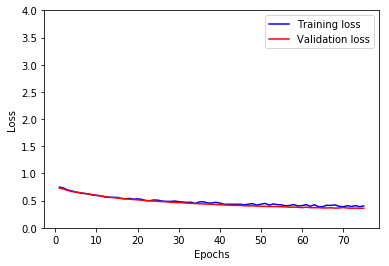

In [14]:
# Visualize the training process: loss function
plt.figure()
plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 4])
plt.legend()
plt.show()

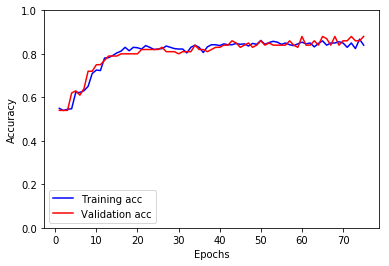

In [15]:
# Visualize the accuracy
plt.figure()
plt.plot(epochs, acc_values, 'b', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()
plt.show()

## 8. Conclusions

&emsp; In conclusion, it quite hard to build the good model with small data set. It very hard to seperate data to train validation and test because we will have smaller training data set for train our models. I try to build many model to find the best model that have highest accuracy. After playing with many model we found the best 3 models base on high accuracy and less false positive.<br>
&emsp; The first one is model that have 2 hidden layers each layer have 4 nuerons with ReLU and sigmoid as activation function. The result is we got the high accuracy which around 87% but it give us high false positive around 20%.<br> 
&emsp; Second model, it has 4 hidden layers which are 2 ReLU and 2 sigmoid as activation function, each layer has 4 neurons. The result is we got a bit lower accuracy from first model around 84% but we get lower false positive that are around 13-15% and this model often be the over-fitting<br>
&emsp; Third model, this is our best model that we found. the model has 4 hidden layers each layer have 4 nuerons which are 2 ReLU and 2 sigmoid as activation function and they are seperate by one dropout layer to prevent the over-fitting. The result is we got quite high accuracy that is around 86% and low false positive around 8-11%.For all model we train with 75 epochs and batch size of 3. Our models have loe learing rate.<br>
&emsp; for this work we had study and know more about deep learning, and come with the small and simple model that have satisfied accuracy and false positive.